In [210]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import array
from numpy import newaxis
import math
from scipy import stats
from subprocess import check_output
import seaborn as sns
# from keras.layers.core import Dense, Activation, Dropout
# from keras.layers.recurrent import LSTM
# from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import load_model


In [202]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [102]:
#load your data to train or predict on 
raw_data = pd.read_csv("features15.csv", low_memory=False)


In [159]:
df = raw_data
df= df.fillna(0)
cols = [c for c in data_frame.columns if c.lower()[-1] == "s"]
a_df = data_frame[cols]

In [281]:
data_frame = df.sort_index(axis=1 ,ascending=True)
data_frame = data_frame.iloc[::-1]
data_frame = data_frame.sort_index(ascending=True, axis=1)
data_frame = data_frame.reindex(index=data_frame.index[::-1])


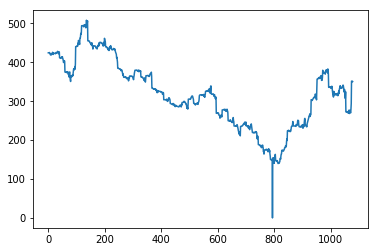

In [249]:
plt.plot(data_frame["CME_SES"])


In [250]:
h = "CME_0DS"
h[-1]
cols = [c for c in data_frame.columns if c.lower()[-1] == "s"]


In [287]:
cols = [c for c in data_frame.columns if c.lower()[-1] == "s"]
a_df = data_frame[cols]


In [264]:
df_z = np.abs(stats.zscore(a_df))
print(df_z)

[1.25234402 1.25234402 1.25088438 ... 0.38691    0.37204291 0.38356697]


In [270]:
threshhold = 3
print(np.where(df_z>threshhold))
df_o = a_df[(df_z < threshhold).all(axis=1)]
print(f"Raw Data: {a_df.shape}")
print(f"Data with Z-Scores > {threshhold} removed: {df_o.shape}")

(array([794], dtype=int64),)


AxisError: axis 1 is out of bounds for array of dimension 1

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


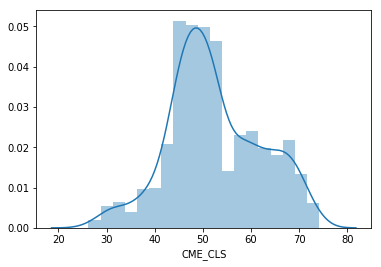

In [244]:
sns.distplot(df_o["CME_CLS"])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


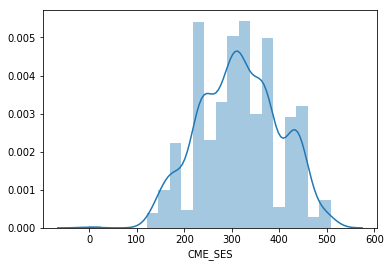

In [245]:
sns.distplot(df_o["CME_SES"])

In [216]:
print("Skewness: %f" % df_o["CME_SES"].skew())
print("Kurtosis: %f" % df_o['CME_SES'].kurt())
print("Skewness: %f" % df_o["CME_CLS"].skew())
print("Kurtosis: %f" % df_o['CME_CLS'].kurt())

Skewness: -0.042981
Kurtosis: -0.515304
Skewness: 0.136990
Kurtosis: -0.310220


In [246]:
df_o

,CME_0DS,CME_0FS,CME_1NS,CME_1RS,CME_5ZS,CME_71S,CME_7HS,CME_7QS,CME_8IS,CME_8ZS,...,LIFFE_WS,SGX_3MFS,SGX_FEFS,SGX_TFS,SHFE_AGS,SHFE_ALS,SHFE_AUS,SHFE_CUS,SHFE_WRS,SHFE_ZNS
0,411.188,434.217,78.833,0.62798,-0.186,1.3270,684.125,1.30363,0.76036,-0.235,...,340.1,370.91,74.05,134.80,3522,14175,281.00,48880,4338,21890
1,411.188,434.217,78.833,0.62813,-0.183,1.3245,684.125,1.30360,0.75961,-0.235,...,340.3,370.75,74.22,137.10,3537,14170,280.70,48840,4327,21755
2,411.226,434.043,78.816,0.62810,-0.184,1.3253,683.631,1.30333,0.75807,-0.257,...,338.2,358.50,74.55,138.40,3536,14180,280.70,48850,4261,21695
3,411.210,434.024,78.849,0.63021,-0.183,1.3259,684.079,1.30446,0.75961,-0.290,...,338.7,362.37,74.32,138.70,3512,14210,279.05,49190,4254,21635
4,413.600,435.133,78.931,0.63247,-0.183,1.3221,684.730,1.31143,0.76247,-0.292,...,338.7,353.37,72.95,140.50,3494,14135,279.85,49000,4236,21625
5,411.736,433.677,79.018,0.63092,-0.174,1.3197,685.383,1.31369,0.76387,-0.296,...,332.4,336.37,72.27,132.60,3525,14175,279.85,49150,4266,21860
6,410.331,432.022,79.153,0.62354,-0.174,1.3263,685.909,1.30932,0.75807,-0.282,...,329.8,325.53,71.03,0.00,3545,14115,280.20,49350,4297,21885
7,407.488,428.680,79.613,0.61821,-0.172,1.3272,687.213,1.29807,0.75217,-0.301,...,329.6,328.03,71.12,0.00,3529,14030,280.00,49380,4243,21760
8,406.986,428.373,78.882,0.61905,-0.171,1.3269,681.167,1.29872,0.75533,-0.316,...,323.0,329.35,71.17,124.80,3525,14015,280.95,49630,4231,21885
9,406.357,427.096,78.442,0.62342,-0.171,1.3265,678.832,1.30128,0.75765,-0.326,...,326.7,362.47,69.28,124.50,3522,13940,280.95,49480,4265,22035


In [234]:
dataset = df_o
dataset = dataset.values
dataset = dataset.astype('float32')
dataset

array([424.371, 424.371, 424.247, ..., 350.85 , 349.587, 350.566],
      dtype=float32)

In [235]:
#scale the data, makes the model happy
np.random.seed(7)

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# dataset = scaler
dataset

ValueError: Expected 2D array, got 1D array instead:
array=[424.371 424.371 424.247 ... 350.85  349.587 350.566].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [232]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

TypeError: object of type 'MinMaxScaler' has no len()

In [197]:
look_back = 3 # sets how many steps out from the current step model is looking, 3 is two days in our timeseries. The current day and two days out.
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [198]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX

array([[[0.85946715],
        [0.85946715],
        [0.85954666]],

       [[0.85946715],
        [0.85954666],
        [0.85951316]],

       [[0.85954666],
        [0.85951316],
        [0.8645088 ]],

       ...,

       [[0.47013727],
        [0.46739492],
        [0.46808675]],

       [[0.46739492],
        [0.46808675],
        [0.4671044 ]],

       [[0.46808675],
        [0.4671044 ],
        [0.46013984]]], dtype=float32)

In [199]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(look_back, 1)))
model.add(Dense(3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 1s - loss: 0.0442
Epoch 2/5
 - 1s - loss: 0.0018
Epoch 3/5
 - 1s - loss: 2.9688e-04
Epoch 4/5
 - 1s - loss: 2.5099e-04
Epoch 5/5
 - 1s - loss: 2.4782e-04


In [200]:
model.save('multilstm.h5') #change file name! lstm_modelCLstep15, lstm_modelCL

In [82]:
model = load_model('multilstm.h5') #load a model 

In [203]:
# make predictions
trainPredict = model.predict(trainX, verbose=2)
testPredict = model.predict(testX, verbose=2)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

ValueError: non-broadcastable output operand with shape (688,1) doesn't match the broadcast shape (688,116)

In [102]:
print((testPredict[2000:2010]),(dataset[8000:8010]))


[[0.3468077 ]
 [0.34272698]
 [0.34951416]
 [0.35562053]
 [0.36356774]
 [0.36121842]
 [0.35494915]
 [0.3511708 ]
 [0.3477213 ]
 [0.35334447]] [[0.2819753 ]
 [0.29702678]
 [0.3059984 ]
 [0.31467345]
 [0.29361615]
 [0.28486696]
 [0.30243942]
 [0.31408027]
 [0.3196412 ]
 [0.30933496]]


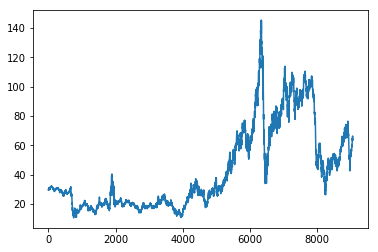

In [348]:
plt.plot(scaler.inverse_transform(dataset))


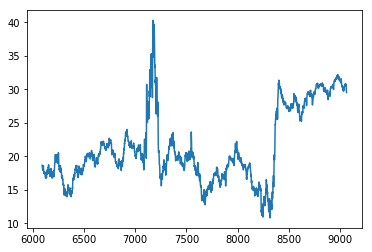

In [319]:
plt.plot(testPredictPlot)


In [438]:
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


Crude Oil Contract - Univariate

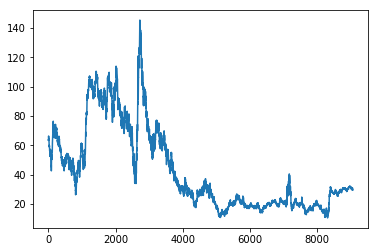